In [177]:
import pandas as pd

#читаю данные в переменную df
df = pd.read_csv('data/Heart_Disease_Prediction.csv')

#информация о датафрейме
print("Data info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [178]:
print("\nData duplicates:")
print(df.duplicated())


Data duplicates:
0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 270, dtype: bool


In [179]:
print("\nIs there empty columns:")
print(df.isna().sum())


Is there empty columns:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [180]:
print("\nDescriptive statistics of the training set")
df.describe().T


Descriptive statistics of the training set


,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.077778,9.201052,29.0,47.0,54.0,60.75,80.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.00,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.60,6.2


In [181]:
print(df.nunique())

Age                         42
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64


### Разбиваем датасет

In [182]:
columns = list(df.columns)

categorical_features = []
num_features = []

for i in columns:
    if len(df[i].unique()) < 5:
        categorical_features.append(i)
    else:
        num_features.append(i)

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", num_features)


Categorical Variables: ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']
Numeric Variables: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']


### Для работы с категориями приведем столбец Heart Disease к булевому признаку

In [183]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in categorical_features:
    if df[i].dtype == 'object':
        df[i] = label_encoder.fit_transform(df[i])

print(df.head())    

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   80    0                3  115          564             0            2   
2   55    1                2  124          261             0            0   
3   65    1                4  128          263             0            0   
4   45    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

## Анализ взаимосвязи параметров

### Анализ категоричных данных

In [184]:
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(df[col].value_counts())


Distribution of categorical variable Sex:
Sex
1    183
0     87
Name: count, dtype: int64

Distribution of categorical variable Chest pain type:
Chest pain type
4    129
3     79
2     42
1     20
Name: count, dtype: int64

Distribution of categorical variable FBS over 120:
FBS over 120
0    230
1     40
Name: count, dtype: int64

Distribution of categorical variable EKG results:
EKG results
2    137
0    131
1      2
Name: count, dtype: int64

Distribution of categorical variable Exercise angina:
Exercise angina
0    181
1     89
Name: count, dtype: int64

Distribution of categorical variable Slope of ST:
Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64

Distribution of categorical variable Number of vessels fluro:
Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64

Distribution of categorical variable Thallium:
Thallium
3    152
7    104
6     14
Name: count, dtype: int64

Distribution of categorical variable Heart Disease:
Heart Di

<Figure size 640x480 with 0 Axes>

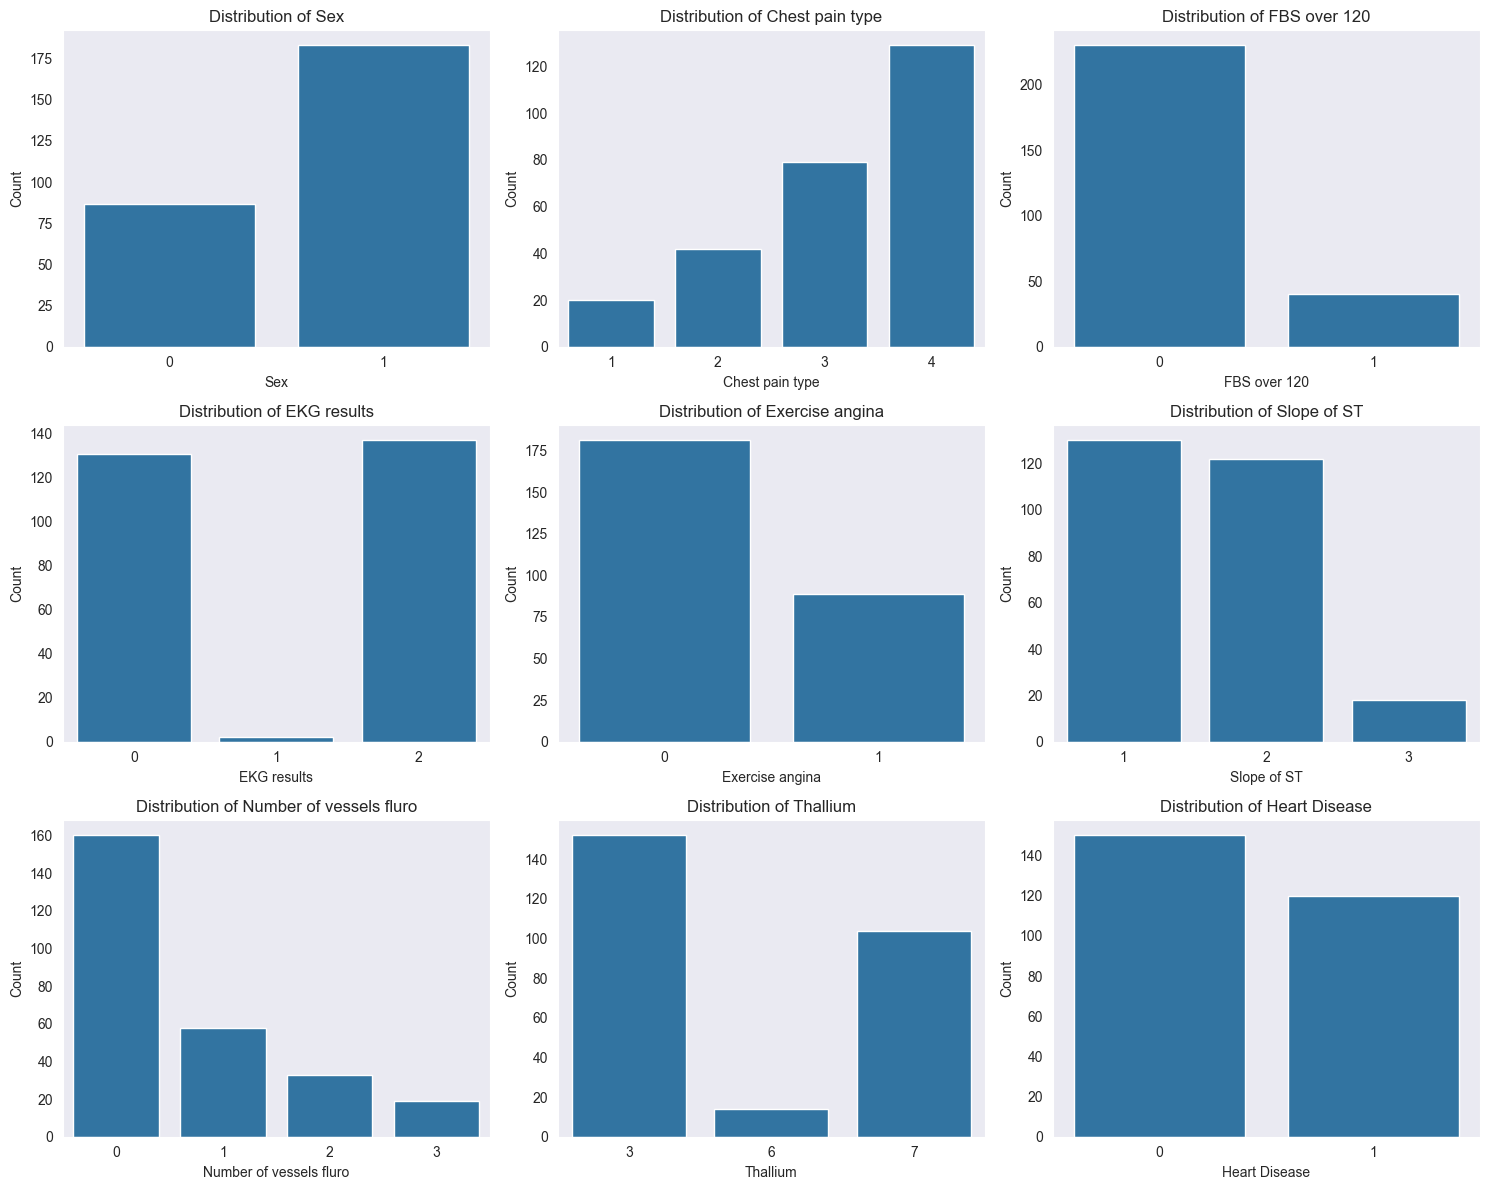

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.tight_layout()

plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(False)

plt.tight_layout()

# Display subplots for numeric variables
plt.show()

### Анализ числовых данных

<Figure size 640x480 with 0 Axes>

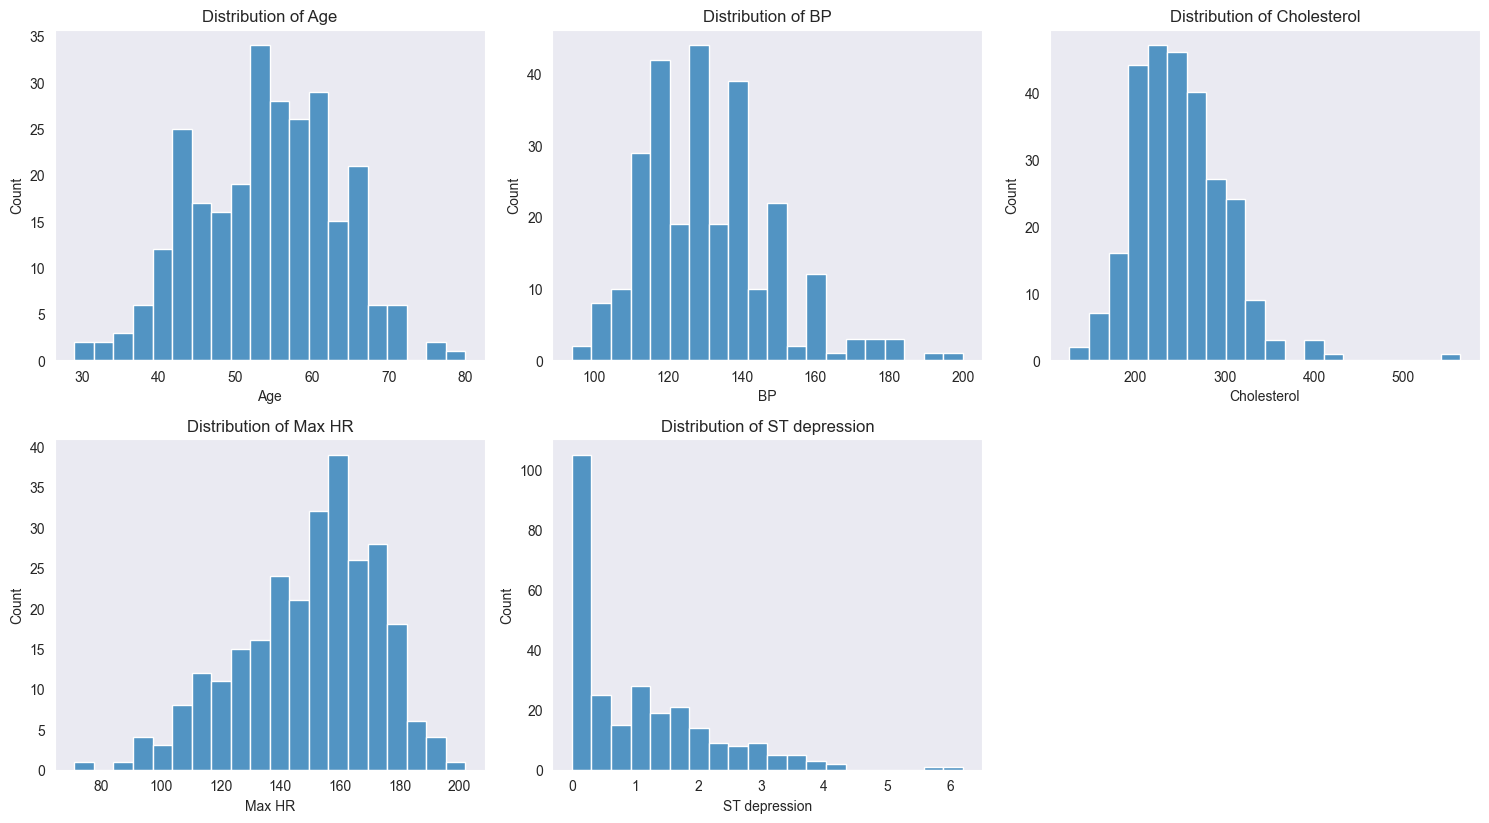

In [186]:
# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display subplots for categorical variables
plt.show()

# Create subplots for numeric variables
plt.figure(figsize=(15, 12))
for i, var in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=var, bins=20)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(False)

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display subplots for numeric variables
plt.show()

### Скейлинг параметров

In [187]:
from sklearn.preprocessing import StandardScaler
df[num_features] = df[num_features].astype('float64')
scaler = StandardScaler()

df[num_features] = scaler.fit_transform(df[num_features])

print(df.head())
print(df.tail())


        Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.733692    1                4 -0.075410     1.402212             0   
1  2.822543    0                3 -0.916759     6.093004             0   
2  0.100416    1                2 -0.411950     0.219823             0   
3  1.189267    1                4 -0.187590     0.258589             0   
4 -0.988434    0                2 -0.636310     0.374890             0   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            2 -1.759208                0       1.181012            2   
1            2  0.446409                0       0.481153            2   
2            0 -0.375291                0      -0.656118            1   
3            0 -1.932198                1      -0.743600            2   
4            2 -1.240239                1      -0.743600            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1       

## Построение моделей

In [188]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Heart Disease')
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Построение KNeighborsClassifier

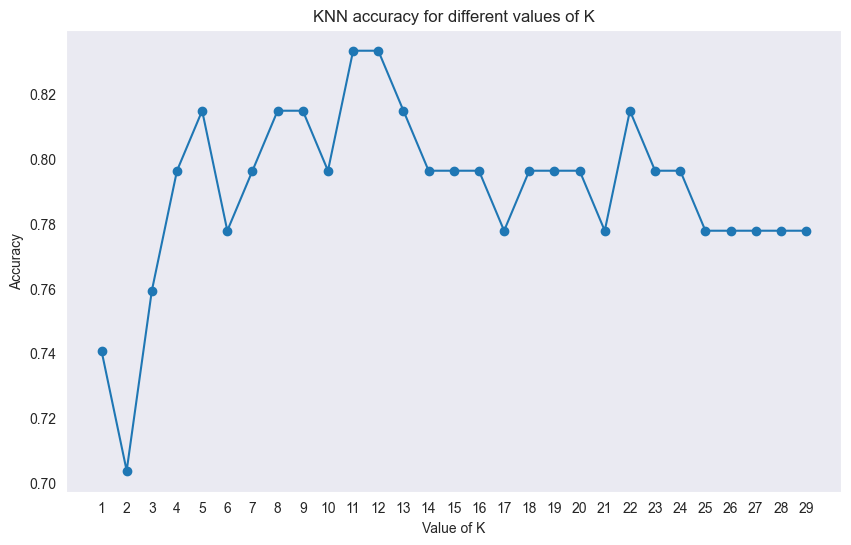

Best value of K: 11
Corresponding accuracy: 0.8333333333333334


In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

n_val = range(1, 30)
accuracies = []

for k in n_val:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_val, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(n_val, n_val)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = n_val[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models = [
    
    # Naive Bayes Model
    GaussianNB(),
    
    # Decision Tree Model
    DecisionTreeClassifier(),
    
    # Random forest model
    RandomForestClassifier(),
    
    # Logistic regression model
    LogisticRegression(max_iter = 1000),
    
    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=best_k),
]

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print(f'\nAccuracy: {accuracy_score(y_test, y_pred):.2f}')
    print("-----------------")

GaussianNB()
Confusion Matrix:
[[32  1]
 [ 4 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54


Accuracy: 0.91
-----------------
DecisionTreeClassifier()
Confusion Matrix:
[[22 11]
 [ 6 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        33
           1       0.58      0.71      0.64        21

    accuracy                           0.69        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.70      0.69      0.69        54


Accuracy: 0.69
-----------------
RandomForestClassifier()
Confusion Matrix:
[[32  1]
 [ 7 14]]

Classification Report:
              precision    recal

In [191]:
#cm = confusion_matrix(y_test, model.predict(X_test))
#print('Confusion matrix \n\n', cm)
# print('\nTrue Positives(TP) = ', cm[0,0])
# print('\nTrue Negatives(TN) = ', cm[1,1])
# print('\nFalse Positives(FP) = ', cm[0,1])
# print('\nFalse Negatives(FN) = ', cm[1,0])
# print()
# plt.figure()
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
#             xticklabels=["Risk Yes", "Risk No"], 
#             yticklabels=["Risk Yes", "Risk No"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title(f"Confusion Matrix: {type(model).__name__}")
# plt.show()